# Experiments (Dataset Statistics)


In [1]:
from utils.generate_gpt import load_data as load_data_public
from utils.generate_glm import load_data as load_data_private

data_public = load_data_public()
data_private = load_data_private()

/opt/anaconda3/envs/dx/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
## average token length of case description and ddx note
import numpy as np

def token_length(input_list):
    length_list = [len(i) for i in input_list]
    len_arr = np.array(length_list)
    return {"Avg": np.average(len_arr), "Std": np.std(len_arr)}

def token_length_inputs(data):
    return {"Case Description": token_length(data["case_description"]),
            "Differential Diagnositic Notes":token_length(data['differential_diagnosis_ch'])}

print("public:", token_length_inputs(data_public))
print("private:", token_length_inputs(data_private))


public: {'Case Description': {'Avg': 240.1788617886179, 'Std': 85.89225927627311}, 'Differential Diagnositic Notes': {'Avg': 242.29268292682926, 'Std': 56.517172252940696}}
private: {'Case Description': {'Avg': 634.9774436090225, 'Std': 257.4964330336322}, 'Differential Diagnositic Notes': {'Avg': 277.812030075188, 'Std': 75.98507474893078}}


[3, 2, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Public: {'Avg': np.float64(3.024390243902439), 'Std': np.float64(0.26939904919968927)}
[3, 4, 4, 2, 3, 2, 3, 2, 2, 3, 4, 4, 2, 3, 3, 3, 3, 7, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 4, 3, 4, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 2, 5, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 2, 2, 3, 3, 3, 3, 1, 4, 3, 4, 2, 3, 2, 5, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 4, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 2, 3, 5, 5, 5, 3, 3, 5, 3, 3, 3, 4, 3, 3, 5, 4, 3, 3, 3, 3]
Private: {'Avg': np.float64(3.172932330827068), 'Std': np.float64(0.888618749034235)}


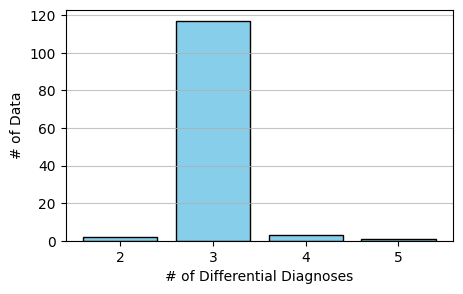

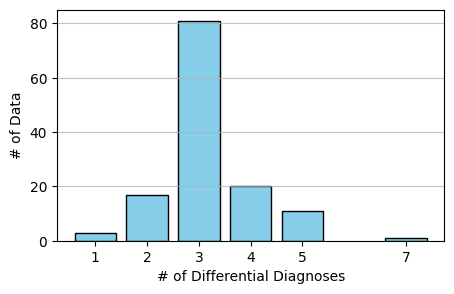

In [3]:
## DDX list length
import re
import matplotlib.pyplot as plt
import numpy as np

def ddx_list_length(input_list, filename):
    length_list = [len(re.findall(r"\d+[\、\，\,\.]", i)) for i in list(input_list)]
    len_arr = np.array(length_list)

    counts = {}
    for count in len_arr:
        if count in counts:
            counts[count] += 1
        else:
            counts[count] = 1

    x = list(counts.keys())
    y = list(counts.values())

    plt.figure(figsize=(5, 3))
    plt.bar(x, y, color='skyblue', edgecolor='black')

    # plt.title('Distribution of DDX list length over data number')
    plt.xlabel('# of Differential Diagnoses')
    plt.ylabel('# of Data')

    plt.xticks(x)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig("./draw/ddx_freq_{}.jpeg".format(filename))
    print(length_list)

    return {"Avg": np.average(len_arr), "Std": np.std(len_arr)}

print("Public:", ddx_list_length(data_public['differential_diagnosis_ch'], "public"))
print("Private:", ddx_list_length(data_private['differential_diagnosis_ch'],"private"))